In [9]:
#!pip install --upgrade pandas


In [11]:
#!pip uninstall pandas
#pip install pandas


^C


# Import necessary libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D



C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load the dataset

 mnist is dataset it contain handwitten digit(0-9)Each image in MNIST dataset is grayscale image with resolution of 28x28pixels.
 keras -Keras provides a high-level interface for building and training neural networks

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
mnist

<module 'keras.datasets.mnist' from 'C:\\Users\\Lenovo\\anaconda3\\Lib\\site-packages\\keras\\datasets\\mnist\\__init__.py'>

# Divide into train and test datasets 
Divide into train and test datasets
splitting the data into X_train (training data) and X_test (testing data) 

In [4]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
 y_train.shape, y_test.shape

((60000,), (10000,))

## sample images of mnist dataset

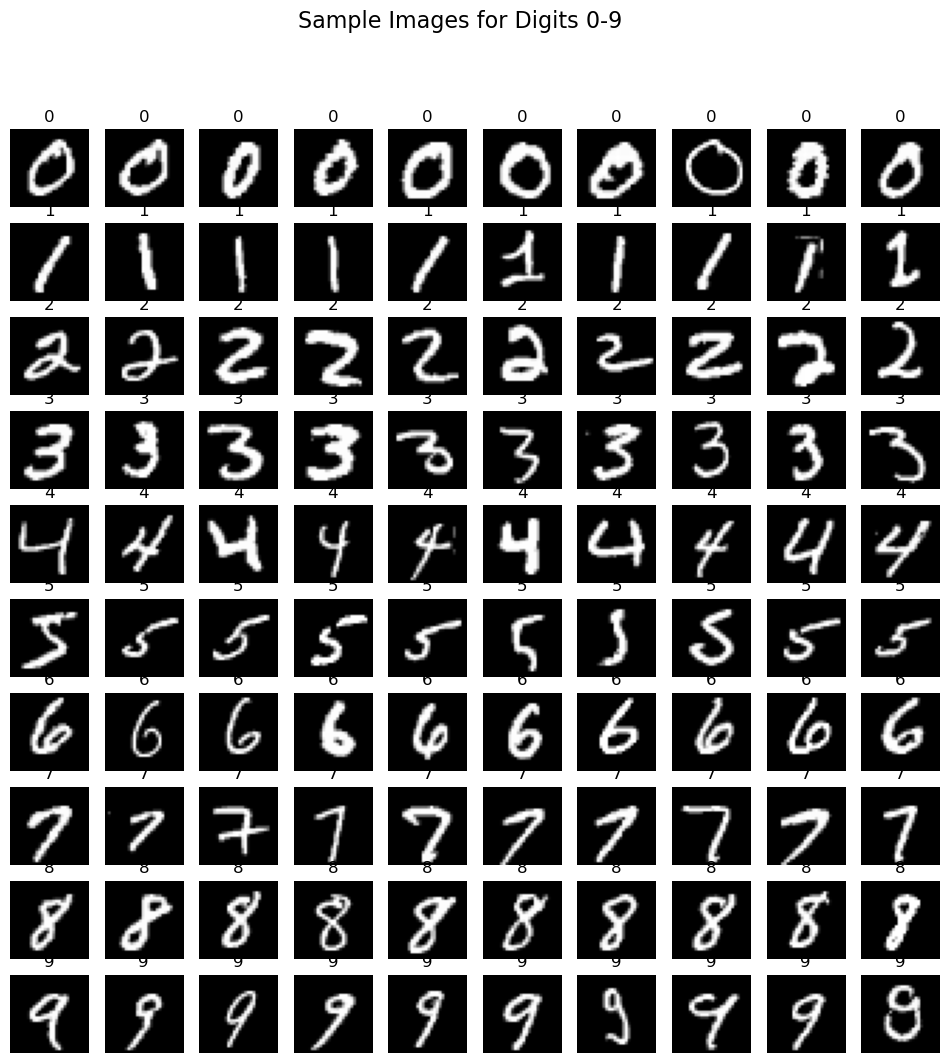

In [6]:
digit_images = {i: [] for i in range(10)}
for image, label in zip(x_train, y_train):
    digit_images[label].append(image)
plt.figure(figsize=(12, 12))
for digit in range(10):
    images = digit_images[digit]
    for i in range(10):  # Display up to 10 images per digit
        plt.subplot(10,10, digit * 10 + i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(str(digit))
        plt.axis('off')
plt.suptitle('Sample Images for Digits 0-9', fontsize=16)
plt.show()

## print random image in dataset

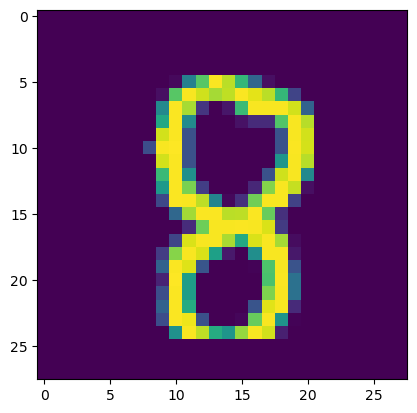

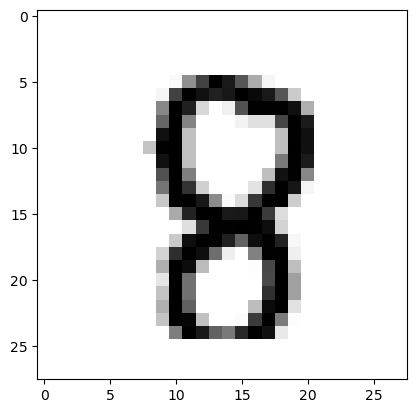

In [7]:
plt.imshow(x_train[188])
plt.show()
plt.imshow(x_train[188], cmap = plt.cm.binary)


In [8]:
y_train[188]

8

# Normalize the data using keras lib

In [9]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
#plt.imshow(x_train[565], cmap = plt.cm.binary)

## Resizing image to make it suitable for apply Convolution operation

In [10]:
x_trainr= np.array(x_train).reshape(-1, 28, 28, 1)
x_testr= np.array(x_test).reshape (-1, 28,28,1)
print("Training Samples dimension",x_trainr.shape)
print("Training Samples dimension",x_testr.shape)


Training Samples dimension (60000, 28, 28, 1)
Training Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
#### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
#1 Build the model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer 1
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
# Pooling layer 2
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(Conv2D(64, (3, 3), activation='relu'))
# Pooling layer 3
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))

# Fully connected layer 2
model.add(Dense(64, activation='relu'))

# Layer 2
model.add(Dense(10, activation='softmax'))




C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Compile the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Train the model and Evaluate the model

In [13]:
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7736 - loss: 0.6909 - val_accuracy: 0.9681 - val_loss: 0.1085
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9648 - loss: 0.1126 - val_accuracy: 0.9697 - val_loss: 0.0932
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9766 - loss: 0.0737 - val_accuracy: 0.9793 - val_loss: 0.0683
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0816
Test accuracy: 0.9793000221252441


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,912 (855.13 KB)

 Trainable params: 72,970 (285.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 145,942 (570.09 KB)

## Evaluateing on testing data set MNIT

In [15]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test Loss: ", test_loss )
print ("Validation Accuracy: ",test_acc )


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9751 - loss: 0.0816
Test Loss:  0.06851834803819656
Validation Accuracy:  0.9793000221252441


In [16]:
## simple model
predicions = model. predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
print(predicions)

[[1.5347819e-06 2.9301650e-06 1.9901029e-06 ... 9.9987304e-01
  4.4908285e-07 5.0320782e-06]
 [5.9158443e-03 7.1060541e-04 9.9301368e-01 ... 3.4403597e-06
  1.8824634e-04 1.1471213e-07]
 [1.0846489e-05 9.9984848e-01 2.0633086e-06 ... 2.5761648e-05
  5.9733633e-05 4.7800554e-06]
 ...
 [4.6686327e-07 1.0450652e-05 2.1787217e-07 ... 7.0893162e-05
  7.3037652e-04 4.1200087e-04]
 [1.1853502e-04 1.1498651e-06 2.9693997e-06 ... 3.2704060e-07
  1.1224855e-02 4.9668390e-05]
 [3.4143374e-04 8.1099358e-07 2.8568560e-05 ... 1.2924741e-09
  2.1858668e-04 3.4967545e-06]]


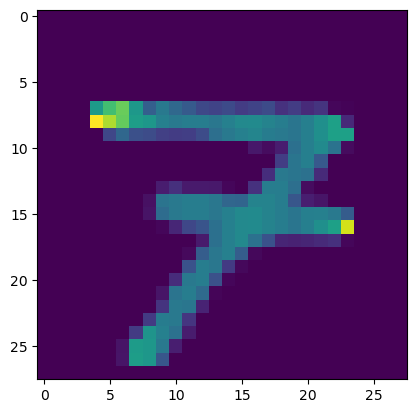

In [18]:
### Check Predection
plt.imshow(x_test[64])

In [19]:
## Prediction 
print (np.argmax(predicions[64]))

7


# create function to give handwritten digit input

Draw on the canvas. Press 'Esc' to exit and display the drawn image.
Drawn Image:


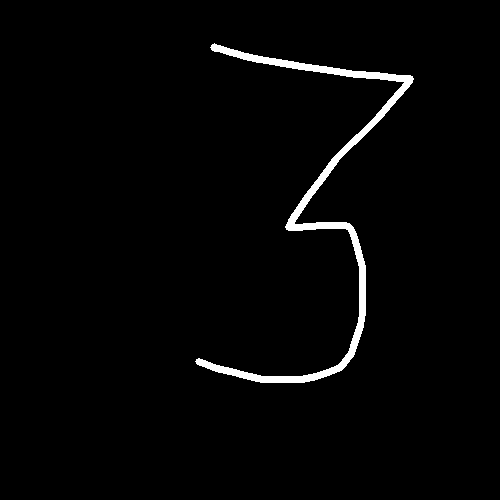

In [32]:
import cv2
import numpy as np
from IPython.display import display, Image
from PIL import Image as PILImage
import io


def display_cv_image(image):
    _, buffer = cv2.imencode('.png', image)
    display(Image(data=buffer))


canvas = np.zeros((500, 500, 3), dtype=np.uint8)


drawing = False
prev_point = None


def draw(event, x, y, flags, param):
    global canvas, drawing, prev_point

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        prev_point = (x, y)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, prev_point, (x, y), (255, 255, 255), 5)
            prev_point = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# Create a window and bind the mouse callback function
cv2.namedWindow('Canvas')
cv2.setMouseCallback('Canvas', draw)

print("Draw on the canvas. Press 'Esc' to exit and display the drawn image.")

while True:
    cv2.imshow('Canvas', canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()

# Display the drawn image
print("Drawn Image:")
display_cv_image(canvas)


In [33]:
img = canvas
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
newimg = tf.keras.utils.normalize (resized, axis = 1) ## e to 1 scaling
IMG_SIZE = 28
newimg= np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predicions = model.predict(newimg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


## Handwritten digit output

In [34]:
print(np.argmax(predicions))

3


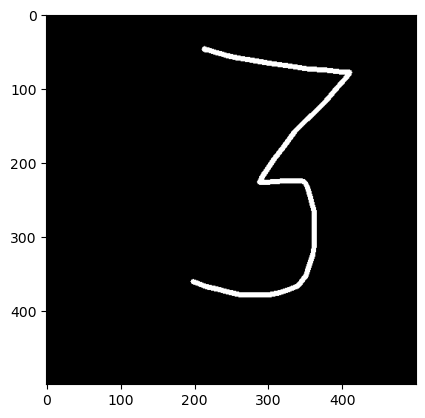

In [35]:
plt.imshow(img)

In [36]:
img.shape

(500, 500, 3)

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

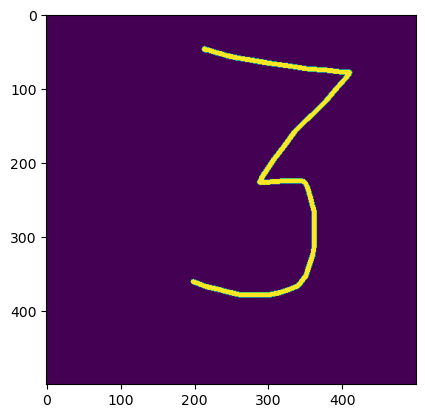

In [38]:
gray.shape
plt.imshow(gray)

In [39]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

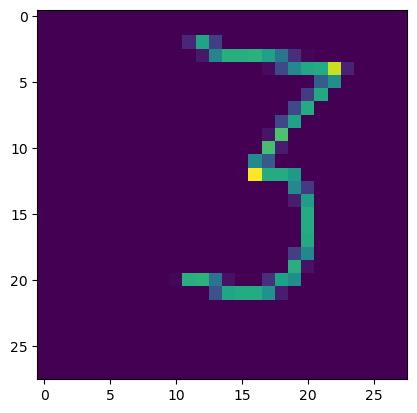

In [40]:
resized.shape
plt.imshow(resized)

In [41]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ## e to 1 scaling

In [42]:
IMG_SIZE = 28
newimg= np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [43]:
newimg.shape
#plt.imshow(newimg)

(1, 28, 28, 1)

In [44]:
predicions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [45]:
print(np.argmax(predicions))

3


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


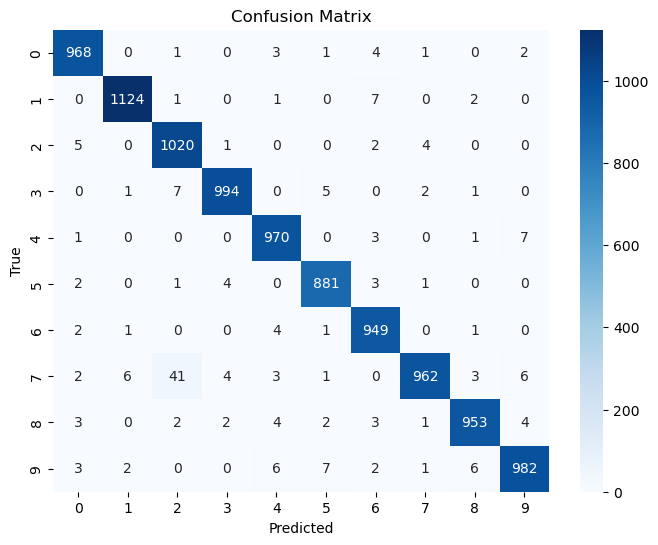

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_testr)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

classes = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
